# Ch 12 - Applied Problems

## Problem 7
In this chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clus- tering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let rij denote the correlation between the ith and jth observations, then the quantity 1 − rij is proportional to the squared Euclidean distance between the ith and jth observations.
On the USArrests data, show that this proportionality holds.

Hint: The Euclidean distance can be calculated using the pairwise_distances() function from the sklearn.metrics module,and pairwise_
correlations can be calculated using the np.corrcoef() function.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./data/USArrests.csv', index_col=0)
data.head()
print(f"{data.shape=}")

data.shape=(50, 4)


In [3]:
scaler = StandardScaler()
data_scl = scaler.fit_transform(data)
print("Mean of standardized data:", np.mean(data_scl, axis=0))  # Should be ~0
print("Std of standardized data:", np.std(data_scl, axis=0))  # Should be ~1

euclidean_sq = pairwise_distances(data_scl, metric='euclidean')**2
print(f"{euclidean_sq.shape=}")

Mean of standardized data: [-7.10542736e-17  1.38777878e-16 -4.39648318e-16  8.59312621e-16]
Std of standardized data: [1. 1. 1. 1.]
euclidean_sq.shape=(50, 50)


In [28]:
one_minus_corrs = 1- np.corrcoef(data_scl)
print(f"{one_minus_corrs.shape=}")

one_minus_corrs.shape=(50, 50)


In [36]:
n_features = data_scl.shape[1]
corr_matrix = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        cov = np.mean(data_scl[i] * data_scl[j])  # Since data is standardized
        corr_matrix[i, j] = cov / (np.std(data_scl[i]) * np.std(data_scl[j]))
one_minus_corrs = 1 - corr_matrix
print(f"{one_minus_corrs.shape=}")

one_minus_corrs.shape=(50, 50)


In [37]:
ratio = one_minus_corrs/(euclidean_sq + 1e-10)
upper_tri_indices = np.triu_indices_from(ratio, k=1)
ratios = ratio[upper_tri_indices]
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
print(f"Mean of proportionality ratio: {mean_ratio:.6f}")
print(f"Standard deviation of proportionality ratio: {std_ratio:.6f}")
print("\nSample of proportionality ratios:")
print(ratios[:10])

Mean of proportionality ratio: -1.762271
Standard deviation of proportionality ratio: 17.045081

Sample of proportionality ratios:
[ 0.0556049   0.09014341  0.17247993  0.07160513  0.14763545  0.1973395
  0.26109011 -0.34834223 -0.22369701  0.16583382]


In [35]:
p = data_scl.shape[1]  # Number of features
expected_ratio = 1 / (2 * p)
print(f"\nExpected proportionality constant (1/(2p)): {expected_ratio:.6f}")


Expected proportionality constant (1/(2p)): 0.125000


*Note:* something isn't working with this. The ratios are supposed to all be roughly 0.125.

## Problem 8
In Section 12.2.3, a formula for calculating PVE was given in Equa- tion 12.10. We also saw that the PVE can be obtained using the explained_variance_ratio_ attribute of a fitted PCA() estimator.
On the USArrests data, calculate PVE in two ways:

(a) Using the explained_variance_ratio_ output of the fitted PCA()
estimator, as was done in Section 12.2.3.

(b) By applying Equation 12.10 directly. The loadings are stored as the components_ attribute of the fitted PCA() estimator. Use those loadings in Equation 12.10 to obtain the PVE.
These two approaches should give the same results.

*Hint:* You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed PCA() using centered and scaled variables, then you must center and scale the variables before applying Equation 12.10 in (b).

In [24]:
from sklearn.decomposition import PCA

In [ ]:
# (a)
pca = PCA()
pca.fit(data_scl)
print(pca.explained_variance_ratio_)

[0.62006039 0.24744129 0.0891408  0.04335752]


In [59]:
# (b) 
n = data_scl.shape[0]
p = data_scl.shape[1]
coefs = []

# Find denominator
den = 0
for i in range(n):
    for j in range(p):
        den += data_scl[i,j]**2

for k in range(len(pca.explained_variance_ratio_)):
    num = 0
    for i in range(n):
        proj = 0
        for j in range(p):
            proj += (pca.components_[k,j]*data_scl[i,j])
        num += proj**2    
    coefs.append(num/den)
print(coefs)    

[0.6200603947873731, 0.24744128813496027, 0.08914079514520744, 0.043357521932458794]


## Problem 9
Consider the USArrests data. We will now perform hierarchical clus- tering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
distances()

(c) Hierarchically cluster the states using complete linkage and Eu- clidean distance, after scaling the variables to have standard de- viation one.

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [9]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

In [10]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


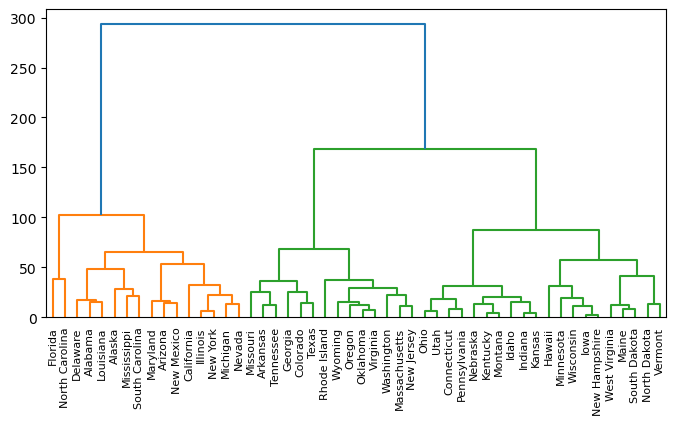

In [11]:
# (a)
cluster = linkage(data, method='complete', metric='euclidean')
fig = plt.figure(figsize=(8,4))
dendrogram(cluster, labels=data.index)
plt.show()

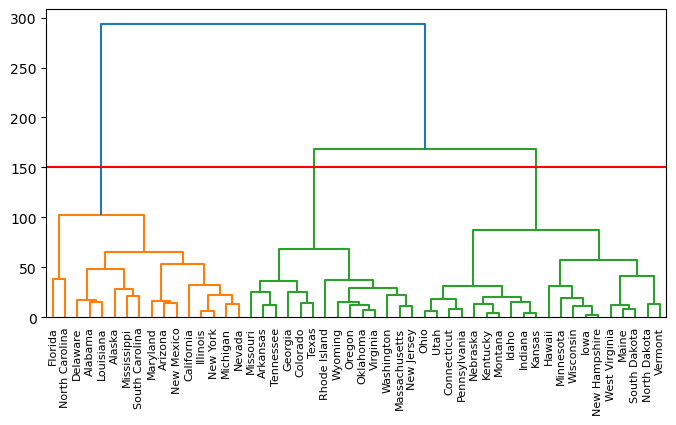

In [16]:
# (b)
fig = plt.figure(figsize=(8,4))
dendrogram(cluster, labels=data.index, p=3)
plt.axhline(y=150, color='red')
plt.show()

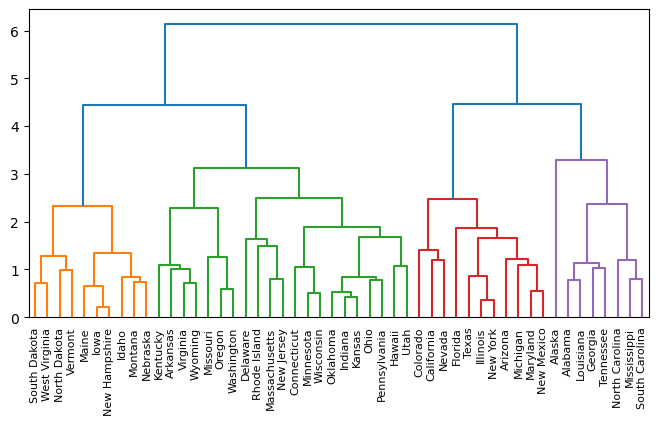

In [17]:
# (c)
cluster = linkage(data_scl, method='complete', metric='euclidean')
fig = plt.figure(figsize=(8,4))
dendrogram(cluster, labels=data.index)
plt.show()

(d) Yes, we need to scale/standardize the features before doing clustering here because the units are not consistent. For example, UrbanPop is a percentage while assault is a number per 100,000. This means the clustering will likely bias heavily towards selecting based on assault and miss patterns with UrbanPop for example because of the vast scale difference.

## Problem 10

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

(b) Perform PCA on the 60 observations and plot the first two prin- cipal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means cluster- ing compare to the true class labels?
Hint: You can use the pd.crosstab() function in Python to com- pare the true class labels to the class labels obtained by cluster- ing. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

(d) Perform K-means clustering with K = 2. Describe your results.

(e) Now perform K-means clustering with K = 4, and describe your
results.

(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

(g) Using the StandardScaler() estimator, perform K-means clus- tering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [36]:
# (a)
np.random.seed(123)
data = np.random.normal(size=(60,50), loc=10)
data[:20, :] = data[:20, :] + 1
data[40:, :] = data[40:, :] - 1
print(f"{data.shape=}")

data.shape=(60, 50)


Text(0.5, 1.0, 'First 2 Principal Components to show Groups')

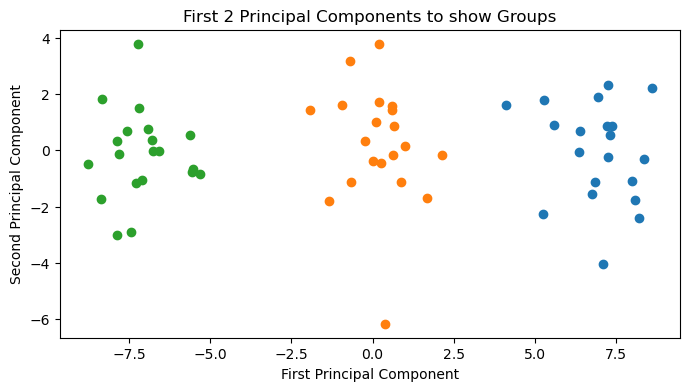

In [40]:
# (b)
pca = PCA()
comps = pca.fit_transform(data) # Fit pca and transform data
first_few = comps[:, :2]# Grab first 2 components
plt.figure(figsize=(8,4))
plt.scatter(first_few[:20,0], first_few[:20,1]) # Plot first group in one color
plt.scatter(first_few[20:40,0], first_few[20:40,1]) # plot second group in sep color
plt.scatter(first_few[40:,0], first_few[40:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("First 2 Principal Components to show Groups")

(b) We knew that there were 3 classes, but it was impractical to plot the data given the p=50 features. However, using the first 2 principal components, we see the separate classes quite clearly!

In [ ]:
# (c) 
from sklearn.cluster import KMeans
import pandas as pd
knn = KMeans(n_clusters=3) # do clustering 
true_clusters = np.zeros(shape=(60,))# create real cluster labels
true_clusters[0:20] = 0
true_clusters[20:40] = 1
true_clusters[40:] = 2
knn.fit(data)
pd.crosstab(knn.labels_, true_clusters)

col_0,0.0,1.0,2.0
row_0,,,
0,20,0,0
1,0,20,0
2,0,0,20


(c) Answer -- Although the class labels aren't the same, the actual clustering works perfectly, evenly splitting the known 3 real clusters into exactly 3 groups with 20 in each class.

In [52]:
# (d)
knn2 = KMeans(n_clusters=2)
knn2.fit(data)
pd.crosstab(knn2.labels_, true_clusters)

col_0,0.0,1.0,2.0
row_0,,,
0,0,19,20
1,20,1,0


(d) Answer -- It clusters 39 in first cluster and 21 in the second one. It also groups the actual classes 1 and 2 together and separates class 3

In [53]:
# (e)
knn4 = KMeans(n_clusters=4)
knn4.fit(data)
pd.crosstab(knn4.labels_, true_clusters)

col_0,0.0,1.0,2.0
row_0,,,
0,19,0,0
1,0,0,8
2,0,0,12
3,1,20,0


(d) Answer -- With n=4 clusters, we see pretty good clustering with the first and second real classes, but the third class is split 12-8 into two separate classes.

In [51]:
# (f)
knn3 = KMeans(n_clusters=3)
knn3.fit(first_few)
pd.crosstab(knn3.labels_, true_clusters)

col_0,0.0,1.0,2.0
row_0,,,
0,20,0,0
1,0,0,20
2,0,20,0


(f) Answer -- Interestingly, if we just take the first 2 principal components and then cluster, we get identical results as if we'd used the full dataset. A perfect grouping into the 3 actual classes!

In [54]:
#(g)
data_scl = StandardScaler().fit_transform(data)
knn = KMeans(n_clusters=3).fit(data_scl)
pd.crosstab(knn.labels_, true_clusters)

col_0,0.0,1.0,2.0
row_0,,,
0,0,0,20
1,20,0,0
2,0,20,0


(g) Answer -- With scaled data we get perfect separation of the actual classes again, but the labels are different than when we did it without scaling.